# Steps
# 1 Import the Libraries
# 2 Load the data
# 3 Preprocessing
* 3.1 OneHotEncoding
* 3.2 Standard Scaling
# 4 Data preparation
# 5 Model Training
# 6 Model Evaluation

# 1 Import the libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
import warnings
warnings.filterwarnings('ignore')

# 2 Load the data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
print(train_data.shape) # target column is 'Fertilizer Name'
print(test_data.shape)
print(train_data.columns) 

(750000, 10)
(250000, 9)
Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [4]:
##################################
##club both train and test data ##
##################################
test_data['Fertilizer Name'] = 'x'
df = pd.concat([train_data, test_data], axis = 0)
df.set_index('id', inplace = True)
print(df.shape) # Ten lakh rows

(1000000, 9)


In [5]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
id,,,,,,,,,
0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,27,69,65,Sandy,Millets,30,6,18,28-28
2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,35,58,43,Red,Paddy,37,2,16,DAP
...,...,...,...,...,...,...,...,...,...
999995,26,66,30,Red,Sugarcane,14,7,18,x
999996,33,62,55,Red,Pulses,28,14,7,x
999997,36,53,64,Black,Paddy,28,11,27,x


In [6]:
col_dict = {
    'Temparature': 'temperature',
    'Humidity': 'humidity',
    'Moisture':'moisture',
    'Soil Type' : 'soil_type',
    'Crop Type' : 'crop_type',
    'Nitrogen' : 'nitrogen',
    'Potassium' : 'potassium',
    'Phosphorous' : 'phosphorous',
    'Fertilizer Name' : 'fertilizer_name'
}

df = df.rename(columns = col_dict)

In [7]:
df.columns

Index(['temperature', 'humidity', 'moisture', 'soil_type', 'crop_type',
       'nitrogen', 'potassium', 'phosphorous', 'fertilizer_name'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   temperature      1000000 non-null  int64 
 1   humidity         1000000 non-null  int64 
 2   moisture         1000000 non-null  int64 
 3   soil_type        1000000 non-null  object
 4   crop_type        1000000 non-null  object
 5   nitrogen         1000000 non-null  int64 
 6   potassium        1000000 non-null  int64 
 7   phosphorous      1000000 non-null  int64 
 8   fertilizer_name  1000000 non-null  object
dtypes: int64(6), object(3)
memory usage: 76.3+ MB


In [9]:
round(df.describe(),1)

,temperature,humidity,moisture,nitrogen,potassium,phosphorous
count,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0
mean,31.5,61.0,45.2,23.1,9.5,21.1
std,4.0,6.6,11.8,11.2,5.8,12.4
min,25.0,50.0,25.0,4.0,0.0,0.0
25%,28.0,55.0,35.0,13.0,4.0,10.0
50%,32.0,61.0,45.0,23.0,9.0,21.0
75%,35.0,67.0,55.0,33.0,14.0,32.0
max,38.0,72.0,65.0,42.0,19.0,42.0


In [10]:
df.isna().sum() # No null values

temperature        0
humidity           0
moisture           0
soil_type          0
crop_type          0
nitrogen           0
potassium          0
phosphorous        0
fertilizer_name    0
dtype: int64

In [11]:
df.duplicated().sum() # No duplicated rows
#df.drop_duplicates() ->  to remove duplicates

np.int64(0)

In [12]:
df.head(2)

,temperature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer_name
id,,,,,,,,,
0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,27,69,65,Sandy,Millets,30,6,18,28-28


In [13]:
print(df['soil_type'].value_counts()) # 5 soil types
print('--------------------------------')
print(df['crop_type'].value_counts()) # 11 crop types
print('--------------------------------')
df['fertilizer_name'].value_counts()  # 7 fertilizers types

soil_type
Sandy     209033
Black     201103
Clayey    198174
Red       197461
Loamy     194229
Name: count, dtype: int64
--------------------------------
crop_type
Paddy          114086
Pulses         104401
Cotton          92262
Tobacco         90728
Wheat           88722
Millets         87180
Barley          86761
Sugarcane       85836
Oil seeds       85711
Maize           83472
Ground Nuts     80841
Name: count, dtype: int64
--------------------------------


fertilizer_name
x           250000
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64

# 3 Preprocessing

## 3.1 OneHotEncoding with LabelEncoder

In [14]:
category_column_names = [col for col in df.columns if df[col].dtype ==  'O'] #['soil_type', 'crop_type', 'fertilizer_name']
numeric_column_names = [ col   for col in df.iloc[:, :8].columns if df[col].dtype != 'object'] # 'O' or 'object' -> same
# ['temperature', 'humidity', 'moisture', 'nitrogen', 'potassium', 'phosphorous']

In [15]:
lbl = LabelEncoder()
for cat in category_column_names:
    df[cat] = lbl.fit_transform(df[cat])
df['fertilizer_name']

id
0         4
1         4
2         2
3         0
4         5
         ..
999995    7
999996    7
999997    7
999998    7
999999    7
Name: fertilizer_name, Length: 1000000, dtype: int64

In [16]:
df.shape # 22 independent features and 1 dependent feature

(1000000, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype
---  ------           --------------    -----
 0   temperature      1000000 non-null  int64
 1   humidity         1000000 non-null  int64
 2   moisture         1000000 non-null  int64
 3   soil_type        1000000 non-null  int64
 4   crop_type        1000000 non-null  int64
 5   nitrogen         1000000 non-null  int64
 6   potassium        1000000 non-null  int64
 7   phosphorous      1000000 non-null  int64
 8   fertilizer_name  1000000 non-null  int64
dtypes: int64(9)
memory usage: 76.3 MB


In [18]:
df.corr()['fertilizer_name']

temperature        0.000101
humidity           0.006635
moisture           0.007024
soil_type          0.010043
crop_type         -0.007476
nitrogen          -0.001537
potassium         -0.005970
phosphorous       -0.002412
fertilizer_name    1.000000
Name: fertilizer_name, dtype: float64

## 3.2 Standard Scaling (optional)

# 4 Data Preparation

In [19]:
X = df.drop('fertilizer_name', axis = 1).iloc[:750000]
y = df['fertilizer_name'][:750000]
test_final = df.drop('fertilizer_name', axis = 1).iloc[750000:]

In [20]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 5 Model Training

#### Insights 
* accuracy score XGB>catboost>LGB>RandomForest

In [21]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [22]:
probs = model.predict_proba(test_final)

In [23]:
top3_indices = np.argsort(probs, axis=1)[:, -3:][:, ::-1]

In [24]:
top3_labels = lbl.inverse_transform(top3_indices.ravel()).reshape(top3_indices.shape)

In [25]:
top3_labels

array([['DAP', '28-28', '14-35-14'],
       ['17-17-17', '20-20', '10-26-26'],
       ['20-20', '14-35-14', '10-26-26'],
       ...,
       ['14-35-14', 'DAP', '28-28'],
       ['10-26-26', '28-28', 'DAP'],
       ['17-17-17', '14-35-14', '10-26-26']], dtype=object)

In [26]:
preds_top3 = [' '.join(row) for row in top3_labels]

In [27]:
submission = pd.DataFrame({
    "id" : test_data['id'],
    "Fertilizer Name" : preds_top3
})

submission.to_csv("submission.csv", index = False) 
submission.head()

,id,Fertilizer Name
0,750000,DAP 28-28 14-35-14
1,750001,17-17-17 20-20 10-26-26
2,750002,20-20 14-35-14 10-26-26
3,750003,14-35-14 17-17-17 10-26-26
4,750004,20-20 10-26-26 17-17-17


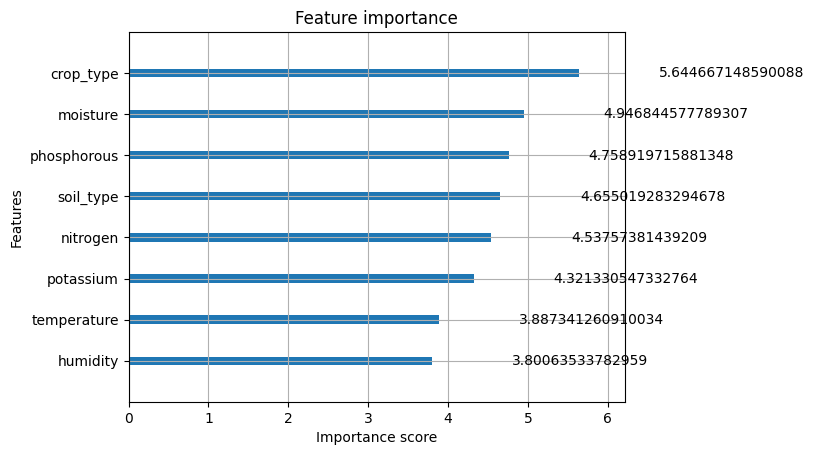

In [32]:
plot_importance(model, max_num_features=10, importance_type='gain')
plt.show()